# IMPORT LIBRARY

In [2]:
import numpy as np
import pandas as pd

# IMPORT DATA  Load the data from ``jester-data-1.csv'',

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# The data is from http://eigentaste.berkeley.edu/dataset/ and it contains the ratings of 100 jokes from 11,190 users
df = pd.read_csv("/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab6_recommendation_movie/jester-data-1.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [5]:
# Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

# Check the dataset description to figure out which value you should replace with NaNs (the cells for which we don't have a rating). This is the test set.
# To replace values when you load, you can find help here: https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan
df = df.replace(99.00, np.nan)
df




,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,37.0,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# The first column(collum "0") gives the number of jokes rated by that user. 
# The next 100 columns give the ratings for jokes 01 - 100
# so delete collum "0" because don't contain rating

# There's a column you need to remove because it doesn't contain ratings. Check the description of the dataset and figure out which one. Then drop it.
df = df.drop(columns=[0])
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Use pandas to find the best- and the worst-rated jokes

In [7]:
mean_each_movie = df.mean(axis=0)
mean_each_movie

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64

In [8]:
# the best-rate jokes movie
the_best_movie = mean_each_movie[mean_each_movie == max(mean_each_movie)]
the_best_movie

50    3.665085
dtype: float64

In [9]:
# the worst-rate jokes movie
the_worst_movie = mean_each_movie[mean_each_movie == min(mean_each_movie)]
the_worst_movie

58   -3.83388
dtype: float64

In [10]:
print("the best movie is:",the_best_movie.index.get_level_values(0)[0])
print("the worst movie is:",the_worst_movie.index.get_level_values(0)[0])

the best movie is: 50
the worst movie is: 58


Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99. This is your validation set. Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).

In [11]:
# Modify and use the helper function provided in the helper_function notebook 
# (or create your own) to label 10% of the dataset cells that are not NaNs as 99. This is your validation set.
# Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).

def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  # rated = np.where(arr!=99)
  rated = np.where(~np.isnan(orig))
  print("rated",rated)
  n_rated = len(rated[0])
  print("n_rated",n_rated)
  # random position ตำเเหน่งindex 1อาจไปอยู่99แต่เค่เปลี่ยนตำเเหน่งเฉยๆ
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  print("idx",idx)
  new_data[rated[0][idx], rated[1][idx]] = 99
  print((rated[0][idx], rated[1][idx]))
  return new_data, (rated[0][idx], rated[1][idx])

In [12]:
arr = df.values
print(arr.shape)

(24983, 100)


In [13]:
rated = np.where(~np.isnan(arr))
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [14]:
new_arr, idx = replace(arr, 0.1)
new_arr

rated (array([    0,     0,     0, ..., 24982, 24982, 24982]), array([ 0,  1,  2, ..., 69, 70, 86]))
n_rated 1810455
idx [  65041  614093 1085906 ...  807683  339769  177018]
(array([  919,  8495, 15036, ..., 11196,  4731,  2503]), array([26, 20, 13, ..., 59, 75, 64]))


array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, 99.  ,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43, 99.  , -3.98, ...,   nan,   nan,   nan]])

In [15]:
new_arr.shape,len(idx)

((24983, 100), 2)

In [16]:
idx

(array([  919,  8495, 15036, ..., 11196,  4731,  2503]),
 array([26, 20, 13, ..., 59, 75, 64]))

In [17]:
arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [18]:
arr[idx[0][0], idx[1][0]]

3.35

In [19]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [20]:
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use latent factor modeling (with 2 latent factors) to infer the hidden ratings of the users (they are labeled as "99" in the dataset) on the training set. You will have to modify at least one line in the provided sgd() function for this (and probably 2, depending on your variable names).

In [21]:
n_latent_factors = 2

user_ratings = df.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [22]:
user_ratings.shape[0],user_ratings.shape[1]

(24983, 100)

In [23]:
user_ratings

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [24]:
# 24983
latent_user_preferences

array([[0.98558283, 0.80219721],
       [0.95036403, 0.12785155],
       [0.25834152, 0.94825728],
       ...,
       [0.96491427, 0.71302102],
       [0.83564127, 0.87413886],
       [0.80477639, 0.47548789]])

In [25]:
# 100
latent_item_features

array([[0.65832376, 0.09941125],
       [0.68551961, 0.88808957],
       [0.3315166 , 0.71348311],
       [0.83877973, 0.27775808],
       [0.25197564, 0.9974877 ],
       [0.17641061, 0.60427753],
       [0.4609571 , 0.78143292],
       [0.20961682, 0.56150074],
       [0.64495785, 0.610209  ],
       [0.43355089, 0.31137315],
       [0.97066253, 0.09297304],
       [0.80476731, 0.18038933],
       [0.52475907, 0.07404858],
       [0.90883828, 0.00304324],
       [0.20964418, 0.46044039],
       [0.22140632, 0.51975822],
       [0.85941516, 0.12775707],
       [0.74400347, 0.15320329],
       [0.31208925, 0.24921983],
       [0.07937052, 0.34566376],
       [0.99033779, 0.82728874],
       [0.29285617, 0.49540872],
       [0.36345201, 0.00507372],
       [0.10154175, 0.21855811],
       [0.707905  , 0.97430012],
       [0.25476847, 0.64213073],
       [0.26698061, 0.87677891],
       [0.1204196 , 0.62067508],
       [0.38835788, 0.23416522],
       [0.6391365 , 0.41632524],
       [0.

In [26]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    
# Use latent factor modeling (with 2 latent factors) to infer the hidden ratings of the users (they are labeled as "99" in the dataset) on the training set.
#  You will have to modify at least one line in the provided sgd() function for this (and probably 2, depending on your variable names).
def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                # if not np.isnan(rating):
                if rating != 99 and not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=26.143097


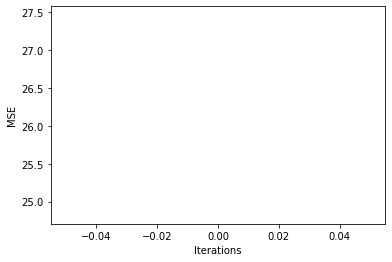

In [27]:
# Iterations in sgd will take a long time to run: you can (and should) use low numbers. Try something like 10.
import matplotlib.pyplot as plt
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()
# You can interrupt at any point the execution of this function, because the values are updated in each iteration, 
# so if you interrupt execution you can use the latent_user_preferences and latent_item_features.
#  Calculate the performance (e.g., MSE) of the algorithm on the validation dataset


In [28]:
#  Make predictions for the test dataset.
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.8056289 , 1.18261307, 1.18463869, ..., 2.10978668, 0.84903275,
        2.76806833],
       [1.18510304, 0.71239603, 0.70251816, ..., 1.24804278, 0.50245795,
        1.71187247],
       [1.93455847, 1.33250204, 1.34616905, ..., 2.40065462, 0.96586679,
        3.07334554],
       ...,
       [1.48970506, 0.96459339, 0.96431422, ..., 1.71685785, 0.69094514,
        2.26549209],
       [1.67454977, 1.10996264, 1.11416022, ..., 1.98491122, 0.79873551,
        2.58883037],
       [1.86905545, 1.20737373, 1.20652256, ..., 2.14794293, 0.8644439 ,
        2.8377059 ]])

In [29]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df.columns
comparison_data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.8056289016432552)","(8.79, 1.1826130719535526)","(-9.66, 1.1846386868000984)","(-8.16, -0.9537653553272561)","(-7.52, 1.206830705341934)","(-8.5, 3.0673514324193514)","(-9.85, 0.02321792822191103)","(4.17, -0.5087214930061894)","(-8.98, -0.03287864952036375)","(-4.76, 2.242947605544052)",...,"(2.82, 3.3470601385041086)","(nan, 2.4696103687475226)","(nan, 4.066783452924489)","(nan, 2.203422568861206)","(nan, 2.092876523953453)","(nan, 2.7899457291661247)","(-5.63, 2.938636098761674)","(nan, 2.109786676338572)","(nan, 0.8490327525909802)","(nan, 2.768068328263709)"
1,"(4.08, 1.1851030361139394)","(-0.29, 0.7123960307247443)","(6.36, 0.7025181629172179)","(4.37, -0.293103221979056)","(-2.38, 0.6384450076729111)","(-9.66, 1.7829666856852573)","(-0.73, 0.08121735886586165)","(-5.34, -0.328855926869975)","(8.88, 0.12569119511684768)","(9.22, 1.2327140307341051)",...,"(2.82, 1.8838967929622858)","(-4.95, 1.618183110866743)","(-0.29, 2.4148679762962377)","(7.86, 1.3773375723983463)","(-0.19, 1.3146050004226282)","(-2.14, 1.7971960179621205)","(3.06, 1.8353871329140792)","(0.34, 1.2480427816107846)","(-4.32, 0.5024579500373767)","(1.07, 1.711872467449459)"
2,"(nan, 1.9345584747307785)","(nan, 1.3325020410038542)","(nan, 1.3461690455800517)","(nan, -1.3633534329412837)","(9.03, 1.4506148966176566)","(9.27, 3.522571856181801)","(9.03, -0.042806458494050875)","(9.27, -0.5502138127782861)","(nan, -0.18629985267050553)","(nan, 2.6487037698774576)",...,"(nan, 3.9070405988724453)","(nan, 2.6487374354674675)","(nan, 4.618052968150264)","(9.08, 2.431386812604086)","(nan, 2.302870652210723)","(nan, 3.0239880548304847)","(nan, 3.2442294147386614)","(nan, 2.4006546187431375)","(nan, 0.9658667933488383)","(nan, 3.07334554001789)"
3,"(nan, 1.0431362387859062)","(8.35, 0.7449974183660976)","(nan, 0.7570215295933912)","(nan, -0.8733934340170613)","(1.8, 0.8460005903199559)","(8.16, 1.9950413563224407)","(-2.82, -0.05048433317790717)","(6.21, -0.2987737826735247)","(nan, -0.16162036109929556)","(1.84, 1.52764807516176)",...,"(nan, 2.236679418914513)","(nan, 1.4293579022256981)","(nan, 2.5957318143565984)","(0.53, 1.339628074008067)","(nan, 1.266250928759931)","(nan, 1.644670230206105)","(nan, 1.7880972835495934)","(nan, 1.3512317910082707)","(nan, 0.5435641236681259)","(nan, 1.7007577800441487)"
4,"(8.5, 1.4703503692763913)","(4.61, 0.9974295630632594)","(-4.17, 1.0051238746610123)","(-5.39, -0.9562131518340055)","(1.36, 1.0656098591625625)","(1.6, 2.621979424088075)","(7.04, -0.016679627292788383)","(4.61, -0.4169764159886531)","(-0.44, -0.10620581293961315)","(5.73, 1.9555984352261733)",...,"(5.19, 2.8943304670756036)","(5.58, 2.0125053627836254)","(4.27, 3.4488109480174645)","(5.19, 1.8314161328901124)","(5.73, 1.7360986916138763)","(1.55, 2.2902063817361866)","(3.11, 2.443325284606637)","(6.55, 1.7917562795762751)","(1.8, 0.7209340780038319)","(1.6, 2.3106668964831294)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 2.0091619564138243)","(7.43, 1.3465587665136547)","(9.08, 1.354195200330734)","(2.33, -1.2211498706021655)","(3.2, 1.4166560282446143)","(6.75, 3.523689811763373)","(-8.79, -0.005852030417320542)","(-0.53, -0.5684845691855862)","(-8.74, -0.1073135846721081)","(7.23, 2.6107596412472356)",...,"(8.83, 3.8746231136359635)","(-1.21, 2.7492928781536787)","(9.22, 4.647336309688931)","(-6.7, 2.484862911814007)","(8.45, 2.357138322967794)","(9.03, 3.1207381281825235)","(6.55, 3.3147167834554203)","(8.69, 2.413252386570673)","(8.79, 0.9710527957238997)","(7.43, 3.1304764027859937)"
24979,"(9.13, 1.1648194253526603)","(-8.16, 0.7657630121345724)","(8.59, 0.7675710946813527)","(9.08, -0.6301698237053815)","(0.87, 0.7854050822711786)","(-8.93, 1.9890624944680455)","(-3.5, 0.012026510819579457)","(5.78, -0.3284038926926587)","(-8.11, -0.027798165343424025)","(4.9, 1.4576458195948456)",...,"(-1.17, 2.1732012652302735)","(-5.73, 

In [30]:
#  OPTIONAL: Repeat the two points above changing hyper-parameters (i.e., learning rate, number of iterations of SGD, number of latent factors, etc.) 
#  as needed to get good results (you can create multiple validation sets if you want, and run a bootstrap!) [i dont know] 
*****************

# learning rate, number of iterations of SGD, number of latent factors
# num_iter = 10
# n_latent_factors = 2
# n_rated = 0.1 * len(df)
#  Open the quiz on moodle. After you've done it, make sure you save all the code you used in Github!

SyntaxError: ignored

# QUIZ

In [31]:
# quiz(1) You have probably noticed that the jokes dataset needs to be loaded carefully.

# Write below the code you've used to load the dataset, 
# and make sure you load it under a dataframe named 'df' in order for the code checker to work well.
df = pd.read_csv("/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab6_recommendation_movie/jester-data-1.csv",header=None)
df = df.replace(99.00, np.nan)
df = df.drop(columns=[0])


In [32]:
# quiz(2) How many users are there in the Jokes dataset?
print(len(df))


24983


In [33]:
# quiz(3) When you load the jokes dataset, 
# there's a value that you need to replace with NaNs to indicate that it's not a rating. Which value is this?
# ans:99.00

In [58]:
# quiz(4)What's the average rating of the worst-rated joke in the Jokes dataset?
# Give your answer with two decimal values (e.g., 1.23).
df.mean().min()


-3.8338796373689923

In [35]:
# # quiz(5)In the lab instructions you have been asked to modify the function sgd() 
# # provided so that neither the validation nor the test set are used for training.

# # Copy and paste the inner loop of your function below.

# import numpy as np

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                # if not np.isnan(rating):
                if rating != 99 and not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:    MSE=%.3f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

# np.random.seed(20)

# n_latent_factors = 10
# latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
# latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))
# hist = sgd(100)

In [59]:
# quiz(6)In the jokes dataset, what's the rating that user 18942 has given to joke 35?
# Give your answer with two decimal values (e.g., 0.13).

# Please use the following syntax in your code to answer this question: df_jester.iloc[user_x, joke_y].
df.iloc[18942,35]

6.02

In [72]:
# quiz(7)
# In the movies dataset, what's the loading of Factor 4 for the movie with ID=4469? 
# Give your answer with three decimal values (e.g., 0.123).
# mov_items = pd.read_excel('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx', sheet_name='Items')
# mov_items

with pd.ExcelFile('/content/drive/MyDrive/essex_university/data_science_and_making_data_decition/lab6_recommendation_movie/movies_latent_factors.xlsx') as reader:
  df_item = pd.read_excel(reader, sheet_name=reader.sheet_names[0])
  df_user = pd.read_excel(reader, sheet_name=reader.sheet_names[1])


df_user[df_user['User'] == 4469]['Factor4']

8   -0.014378
Name: Factor4, dtype: float64

In [107]:
# quiz(8) In the movies dataset, which of the following IDs corresponds to the movie with the lowest loading of factor 2?
df_item[df_item['Factor2'] == min(df_item['Factor2'])]['Movie ID']


16    122
Name: Movie ID, dtype: int64

In [110]:
# quiz(9) In the movies dataset, predict the rating that the user with ID 768 will give to the movie with ID 141. 
# Give your answer with two decimal values (e.g., 0.12).
movie_id_clean = df_item[df_item['Movie ID'] == 141]
movie_id_clean.drop('Movie ID',inplace=True,axis=1)
movie_id_clean.drop('Title',inplace=True,axis=1)
movie_id_clean
# df_item

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
18,0.056865,1.573001,0.631437,-0.019755,0.390186,-0.075435,-0.443608,-0.987379,0.135949,-0.156905,0.442035,-0.284181,0.698186,0.260986,0.472673


In [111]:
user_id_clean = df_user[df_user['User'] == 768]
user_id_clean.drop('User',inplace=True,axis=1)
user_id_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
7,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.00667


In [112]:
predictions = movie_id_clean.dot(user_id_clean.T)
predictions #answer

,7
18,-0.035574


In [117]:
# quiz(10) In the movies dataset, predict the rating that the user with ID 4373 will give to the movie with ID 786. 
# Give your answer with two decimal values (e.g., 0.12).
movie_id_clean = df_item[df_item['Movie ID'] == 786]
movie_id_clean.drop('Movie ID',inplace=True,axis=1)
movie_id_clean.drop('Title',inplace=True,axis=1)
movie_id_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
62,0.640685,1.199326,0.270392,0.371095,0.479752,-0.144391,-0.752597,-0.5637,0.439893,0.267137,-0.242001,0.033085,-0.309858,0.005433,0.256299


In [118]:
user_id_clean = df_user[df_user['User'] == 4373]
user_id_clean.drop('User',inplace=True,axis=1)
user_id_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
18,-0.13655,-0.089406,-0.235399,0.120585,-0.168168,0.12999,-0.035084,-0.324028,0.087531,0.04529,0.20785,-0.028972,-0.175184,-0.058283,0.147797


In [119]:
predictions = movie_id_clean.dot(user_id_clean.T)
predictions #answer

,18
62,-0.012813


In [80]:
# quiz(11) In the movies dataset, if you had to recommend 3 movies to the user with ID=1882, which ones would you choose?

In [120]:
# user_id == 1882 and clean
user_id_clean = df_user[df_user['User'] == 1882]
user_id_clean.drop('User', inplace=True, axis=1)
user_id_clean



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
9,-0.083093,-0.02916,0.013748,0.022716,-0.062732,-0.08067,-0.019723,0.013253,-0.091305,-0.090687,0.030638,-0.113364,-0.021325,0.181508,0.022357


In [121]:
movie_all_items = df_item.copy()
movie_all_items.drop('Title', inplace=True, axis=1)
movie_all_items.drop('Movie ID', inplace=True, axis=1)
movie_all_items



,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
96,1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
97,0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790
98,1.161006,-0.715613,0.712633,-0.688808,-0.717785,-1.007047,-0.267268,-0.802322,-0.249239,-0.540419,-0.291422,-0.240216,0.290714,-1.217250,-0.288130


In [126]:
# predictions = movie_all_items.dot(user_id_clean.T)
predictions = movie_all_items.dot(user_id_clean.T)

predictions

,9
0,0.220284
1,0.366293
2,-0.212080
3,0.311120
4,0.249506
...,...
95,0.230796
96,0.098098
97,-0.105606
98,-0.104062


In [127]:
# most_2_recommend_movies = predictions.stack().nlargest(2)
most_2_recommend_movies = predictions.sort_values(9,ascending=False)
most_2_recommend_movies

,9
51,0.769912
50,0.725877
47,0.609041
21,0.453408
41,0.401888
...,...
99,-0.445656
26,-0.478864
63,-0.506743
94,-0.511003


In [130]:
df_item.loc[51]['Title']# ans


'The Matrix Reloaded (2003)'

In [131]:
df_item.loc[50]['Title']# ans

'The Matrix (1999)'

In [132]:
df_item.loc[47]['Title']# ans

'Titanic (1997)'

In [133]:
# quiz(12) In the movies dataset, if you had to recommend 2 movies to the user with ID=3878, which ones would you choose?

user_id_clean = df_user[df_user["User"] == 3878]
user_id_clean.drop("User",inplace=True,axis=1)
user_id_clean
# df_item


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
6,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.18925,0.06599,0.102776


In [134]:
movie_all_items = df_item.copy()
movie_all_items.drop("Movie ID",axis=1,inplace=True)
movie_all_items.drop("Title",axis=1,inplace=True)
movie_all_items

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
96,1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
97,0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790
98,1.161006,-0.715613,0.712633,-0.688808,-0.717785,-1.007047,-0.267268,-0.802322,-0.249239,-0.540419,-0.291422,-0.240216,0.290714,-1.217250,-0.288130


In [135]:
predictions = movie_all_items.dot(user_id_clean.T)
predictions

,6
0,0.619344
1,0.396214
2,0.205784
3,-0.078449
4,-0.686052
...,...
95,0.363791
96,0.129306
97,-0.376227
98,-0.555636


In [137]:
predictions.sort_values(6,ascending=False)
# .stack().nlargest(2)

,6
11,0.928983
90,0.874465
21,0.844621
35,0.817604
9,0.774292
...,...
86,-1.234513
51,-1.792012
16,-1.980168
14,-1.992433


In [140]:
df_item.loc[11]['Movie ID']

105

In [141]:
df_item.loc[90]['Movie ID']

8467